## 1) Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%y').date()

## 2) Load the reviewers support dataset

In [3]:
data_reviewers_support=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\Msi Reviewers support ch.xlsx",header=0,date_parser='Date')
data_reviewers_support.head()

,Date,Link to incident,link to slack,Rating,Remarks
0,NaT,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,NaN
1,NaT,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,NaN
2,NaT,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,NaN
3,NaT,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,NaN
4,NaT,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,NaN


In [4]:
data_reviewers_support=data_reviewers_support.iloc[45:]
data_reviewers_support.head()

,Date,Link to incident,link to slack,Rating,Remarks
45,2021-01-22,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Mallikarjun
46,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun
47,2021-01-24,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
48,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
49,2021-01-25,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra


In [5]:
data_reviewers_support.shape

(128, 5)

In [6]:
data_reviewers_support.size

640

In [7]:
data_reviewers_support.isna().sum().to_frame().T

,Date,Link to incident,link to slack,Rating,Remarks
0,0,19,1,1,6


## 3) Analysis of the ratings and remarks in the month of January 2021

In [8]:
data_reviewers_support_January=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-01-22') & (data_reviewers_support['Date'] <= '2021-01-31')]
data_reviewers_support_January

,Date,Link to incident,link to slack,Rating,Remarks
45,2021-01-22,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Mallikarjun
46,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun
47,2021-01-24,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
48,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
49,2021-01-25,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
50,2021-01-25,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun
51,2021-01-25,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,1hr 04mins - 1 reviewer only,NaN
52,2021-01-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Shiva Kumar
53,2021-01-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
54,2021-01-27,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja


In [9]:
data_reviewers_support_January.shape

(11, 5)

In [10]:
data_reviewers_support_January.size

55

In [11]:
data_reviewers_support_January.isna().sum().to_frame().T

,Date,Link to incident,link to slack,Rating,Remarks
0,0,4,0,0,1


#### Checking total false alarms in the month of January 2021

In [12]:
data_reviewers_support_January['Rating'].unique()

array(['Wrong rating - No accident', 'missed collision',
       '1hr 04mins - 1 reviewer only'], dtype=object)

In [13]:
data_reviewers_support_January['Rating'].value_counts()

missed collision                8
Wrong rating - No accident      2
1hr 04mins - 1 reviewer only    1
Name: Rating, dtype: int64

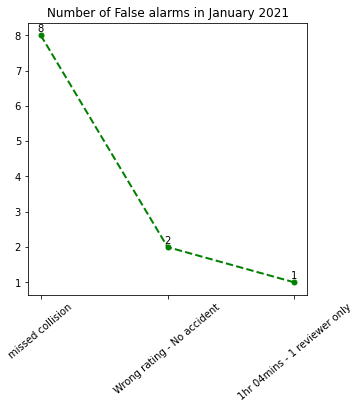

In [14]:
X=data_reviewers_support_January['Rating'].value_counts()
plt.figure(figsize=(5,5))
plt.plot(X,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Number of False alarms in January 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.09, "%d" %v, ha="center")
plt.show()

In [15]:
data_reviewers_support_January['Rating'].count()

11

#### Checking for the reviewers involved in the false alarms for the January 2021

In [16]:
data_reviewers_support_January['Remarks'].unique()

array(['Mallikarjun', 'Narendra', 'Yuvaraja', nan, 'Shiva Kumar'],
      dtype=object)

In [17]:
data_reviewers_support_January['Remarks'].value_counts()

Yuvaraja       3
Narendra       3
Mallikarjun    3
Shiva Kumar    1
Name: Remarks, dtype: int64

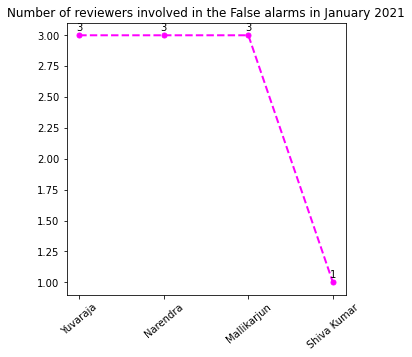

In [18]:
X=data_reviewers_support_January['Remarks'].value_counts()
plt.figure(figsize=(5,5))
plt.plot(X,color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Number of reviewers involved in the False alarms in January 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.04, "%d" %v, ha="center")
plt.show()

In [19]:
data_reviewers_support_January['Remarks'].count()

10

#### Counting the each reviewers false alarms for the January 2021
#### 1) Wrong rating no accident

In [20]:
wrong_rating_no_accident= data_reviewers_support_January[(data_reviewers_support_January['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident

,Date,Link to incident,link to slack,Rating,Remarks
45,2021-01-22,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Mallikarjun
55,2021-01-29,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Narendra


In [21]:
wrong_rating_no_accident['Remarks'].value_counts()

Narendra       1
Mallikarjun    1
Name: Remarks, dtype: int64

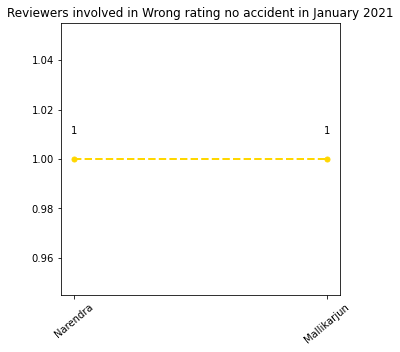

In [22]:
x=wrong_rating_no_accident['Remarks'].value_counts()
plt.figure(figsize=(5,5))
plt.plot(x,color='gold', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers involved in Wrong rating no accident in January 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.01, "%d" %v, ha="center")
plt.show()

In [23]:
wrong_rating_no_accident['Remarks'].count()

2

#### 2) Missed Collision

In [24]:
missed_collision= data_reviewers_support_January[(data_reviewers_support_January['Rating']=='missed collision')]
missed_collision

,Date,Link to incident,link to slack,Rating,Remarks
46,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun
47,2021-01-24,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
48,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
49,2021-01-25,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
50,2021-01-25,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun
52,2021-01-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Shiva Kumar
53,2021-01-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
54,2021-01-27,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja


In [25]:
missed_collision['Remarks'].value_counts()

Yuvaraja       3
Narendra       2
Mallikarjun    2
Shiva Kumar    1
Name: Remarks, dtype: int64

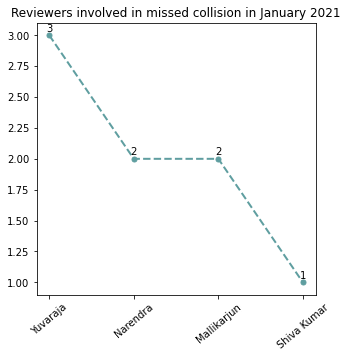

In [26]:
x=missed_collision['Remarks'].value_counts()
plt.figure(figsize=(5,5))
plt.plot(x,color='cadetblue', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers involved in missed collision in January 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [27]:
missed_collision['Remarks'].count()

8

#### 3) 1hr 04mins - 1 reviewer only

In [28]:
onehr_04mins_1_reviewer_only= data_reviewers_support_January[(data_reviewers_support_January['Rating']=='1hr 04mins - 1 reviewer only')]
onehr_04mins_1_reviewer_only

,Date,Link to incident,link to slack,Rating,Remarks
51,2021-01-25,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,1hr 04mins - 1 reviewer only,NaN


In [29]:
onehr_04mins_1_reviewer_only['Remarks'].value_counts()

Series([], Name: Remarks, dtype: int64)

## 4) Analysis of the ratings and remarks in the month of February 2021

In [30]:
data_reviewers_support_February=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-02-01') & (data_reviewers_support['Date'] <= '2021-02-28')]
data_reviewers_support_February.head()

,Date,Link to incident,link to slack,Rating,Remarks
56,2021-02-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Shivam
57,2021-02-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
58,2021-02-02,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
59,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
60,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna


In [31]:
data_reviewers_support_February.shape

(38, 5)

In [32]:
data_reviewers_support_February.size

190

In [33]:
data_reviewers_support_February.isna().sum().to_frame().T

,Date,Link to incident,link to slack,Rating,Remarks
0,0,8,0,0,2


#### Checking total false alarms in the month of February 2021

In [34]:
data_reviewers_support_February['Rating'].unique()

array(['missed collision', 'Wrong rating - No accident',
       'grabbed no submitted review', '1hour to submit review',
       '4:04 last submitted- 6:37 grabbed= 2h 33m',
       'Wrong rating - Accident',
       'P1 missed accident - review resubmitted'], dtype=object)

In [35]:
data_reviewers_support_February['Rating'].value_counts()

missed collision                             24
Wrong rating - No accident                    8
Wrong rating - Accident                       2
4:04 last submitted- 6:37 grabbed= 2h 33m     1
grabbed no submitted review                   1
1hour to submit review                        1
P1 missed accident - review resubmitted       1
Name: Rating, dtype: int64

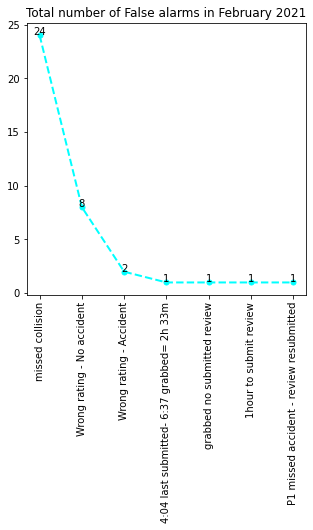

In [36]:
x=data_reviewers_support_February['Rating'].value_counts()
plt.figure(figsize=(5,5))
plt.plot(x,color='cyan', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.title("Total number of False alarms in February 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [37]:
data_reviewers_support_February['Rating'].count()

38

#### Checking for the reviewers involved in the false alarms for the February 2021

In [38]:
data_reviewers_support_February['Remarks'].unique()

array(['Shivam', 'Aparna', 'Yuvaraja', 'Rajeshwari', 'Narendra',
       'Shiva Kumar', 'Kiran', nan], dtype=object)

In [39]:
data_reviewers_support_February['Remarks'].value_counts()

Aparna         10
Shivam          9
Yuvaraja        5
Kiran           3
Rajeshwari      3
Narendra        3
Shiva Kumar     3
Name: Remarks, dtype: int64

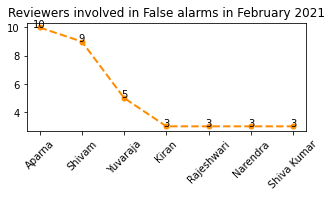

In [40]:
x=data_reviewers_support_February['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='darkorange', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=45)
plt.title("Reviewers involved in False alarms in February 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [41]:
data_reviewers_support_February['Remarks'].count()

36

#### Counting the each reviewers false alarms for the February 2021
#### 1) missed collision

In [42]:
missed_collision= data_reviewers_support_February[(data_reviewers_support_February['Rating']=='missed collision')]
missed_collision

,Date,Link to incident,link to slack,Rating,Remarks
56,2021-02-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Shivam
57,2021-02-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
58,2021-02-02,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
59,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
60,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
61,2021-02-03,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
62,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
63,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
64,2021-02-04,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
69,2021-02-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna


In [43]:
missed_collision['Remarks'].value_counts()

Aparna         7
Shivam         5
Yuvaraja       4
Rajeshwari     2
Narendra       2
Kiran          1
Shiva Kumar    1
Name: Remarks, dtype: int64

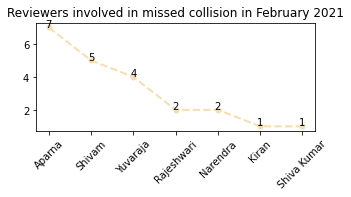

In [44]:
x=missed_collision['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='wheat', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=45)
plt.title("Reviewers involved in missed collision in February 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [45]:
missed_collision['Remarks'].count()

22

#### 2) Wrong rating - No accident

In [46]:
wrong_rating_no_accident= data_reviewers_support_February[(data_reviewers_support_February['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident

,Date,Link to incident,link to slack,Rating,Remarks
65,2021-02-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam
66,2021-02-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
67,2021-02-04,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam
68,2021-02-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam
86,2021-02-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Aparna
87,2021-02-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shivam
88,2021-02-25,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Kiran
89,2021-02-25,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Yuvaraja


In [47]:
wrong_rating_no_accident['Remarks'].value_counts()

Shivam      4
Aparna      2
Kiran       1
Yuvaraja    1
Name: Remarks, dtype: int64

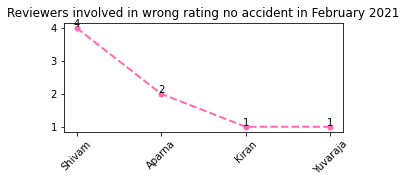

In [48]:
x=wrong_rating_no_accident['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='hotpink', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=45)
plt.title("Reviewers involved in wrong rating no accident in February 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [49]:
wrong_rating_no_accident['Remarks'].count()

8

#### 3) Wrong rating - Accident

In [50]:
wrong_rating_accident= data_reviewers_support_February[(data_reviewers_support_February['Rating']=='Wrong rating - Accident')]
wrong_rating_accident

,Date,Link to incident,link to slack,Rating,Remarks
91,2021-02-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Kiran
92,2021-02-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna


In [51]:
wrong_rating_accident['Remarks'].value_counts()

Aparna    1
Kiran     1
Name: Remarks, dtype: int64

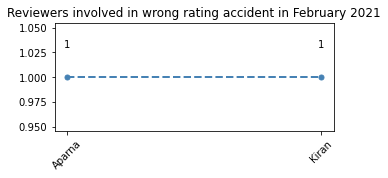

In [52]:
x=wrong_rating_accident['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='steelblue', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=45)
plt.title("Reviewers involved in wrong rating accident in February 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [53]:
wrong_rating_accident['Remarks'].count()

2

#### 4) P1 missed accident - review resubmitted

In [54]:
P1_missed_accident_review_resubmitted= data_reviewers_support_February[(data_reviewers_support_February['Rating']=='P1 missed accident - review resubmitted')]
P1_missed_accident_review_resubmitted

,Date,Link to incident,link to slack,Rating,Remarks
93,2021-02-28,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,P1 missed accident - review resubmitted,Shiva Kumar


In [55]:
P1_missed_accident_review_resubmitted['Remarks'].value_counts()

Shiva Kumar    1
Name: Remarks, dtype: int64

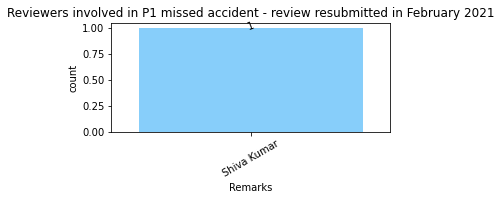

In [56]:
plt.figure(figsize=(5,2))
splot=sns.countplot(P1_missed_accident_review_resubmitted['Remarks'],order=P1_missed_accident_review_resubmitted['Remarks'].value_counts().index,saturation=10,color='lightskyblue')
plt.xticks(rotation=30)
plt.title("Reviewers involved in P1 missed accident - review resubmitted in February 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 5) grabbed no submitted review

In [57]:
grabbed_no_submitted_review= data_reviewers_support_February[(data_reviewers_support_February['Rating']=='grabbed no submitted review')]
grabbed_no_submitted_review

,Date,Link to incident,link to slack,Rating,Remarks
72,2021-02-06,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01ESDUFXT4/p...,grabbed no submitted review,Narendra


In [58]:
grabbed_no_submitted_review['Remarks'].value_counts()

Narendra    1
Name: Remarks, dtype: int64

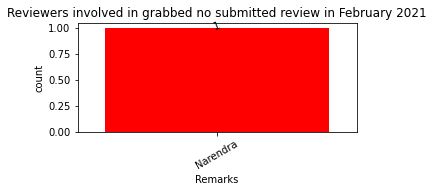

In [59]:
plt.figure(figsize=(5,2))
splot=sns.countplot(grabbed_no_submitted_review['Remarks'],order=grabbed_no_submitted_review['Remarks'].value_counts().index,saturation=10,color='red')
plt.xticks(rotation=30)
plt.title("Reviewers involved in grabbed no submitted review in February 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 6) 4:04 last submitted- 6:37 grabbed= 2h 33m

In [60]:
fourzerofour_last_submitted_6_37_grabbed_2h_33m=data_reviewers_support_February[(data_reviewers_support_February['Rating']=='4:04 last submitted- 6:37 grabbed= 2h 33m')]
fourzerofour_last_submitted_6_37_grabbed_2h_33m

,Date,Link to incident,link to slack,Rating,Remarks
74,2021-02-08,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,4:04 last submitted- 6:37 grabbed= 2h 33m,Shiva Kumar


In [61]:
fourzerofour_last_submitted_6_37_grabbed_2h_33m['Remarks'].value_counts()

Shiva Kumar    1
Name: Remarks, dtype: int64

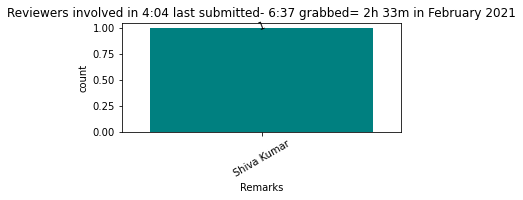

In [62]:
plt.figure(figsize=(5,2))
splot=sns.countplot(fourzerofour_last_submitted_6_37_grabbed_2h_33m['Remarks'],order=fourzerofour_last_submitted_6_37_grabbed_2h_33m['Remarks'].value_counts().index,saturation=10,color='teal')
plt.xticks(rotation=30)
plt.title("Reviewers involved in 4:04 last submitted- 6:37 grabbed= 2h 33m in February 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 7) 1hour to submit review

In [63]:
onehour_to_submit_review=data_reviewers_support_February[(data_reviewers_support_February['Rating']=='1hour to submit review')]
onehour_to_submit_review

,Date,Link to incident,link to slack,Rating,Remarks
73,2021-02-06,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01ESDUFXT4/p...,1hour to submit review,Rajeshwari


In [64]:
onehour_to_submit_review['Remarks'].value_counts()

Rajeshwari    1
Name: Remarks, dtype: int64

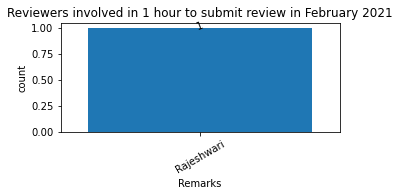

In [65]:
plt.figure(figsize=(5,2))
splot=sns.countplot(onehour_to_submit_review['Remarks'],order=onehour_to_submit_review['Remarks'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in 1 hour to submit review in February 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

## 5) Analysis of the ratings and remarks in the month of March 2021

In [66]:
data_reviewers_support_March=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-03-01') & (data_reviewers_support['Date'] <= '2021-03-31')]
data_reviewers_support_March.head()

,Date,Link to incident,link to slack,Rating,Remarks
94,2021-03-01,NaN,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
95,2021-03-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
96,2021-03-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Shivam
97,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
98,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna


In [67]:
data_reviewers_support_March.shape

(55, 5)

In [68]:
data_reviewers_support_March.size

275

In [69]:
data_reviewers_support_March.isna().sum().to_frame().T

,Date,Link to incident,link to slack,Rating,Remarks
0,0,4,1,1,1


#### Checking total false alarms in the month of March 2021

In [70]:
data_reviewers_support_March['Rating'].unique()

array(['Wrong rating - No accident', 'Wrong rating - Accident',
       'Hard to rate incidents', nan, 'last grabbed incident'],
      dtype=object)

In [71]:
data_reviewers_support_March['Rating'].value_counts()

Wrong rating - Accident       35
Wrong rating - No accident    15
Hard to rate incidents         2
last grabbed incident          2
Name: Rating, dtype: int64

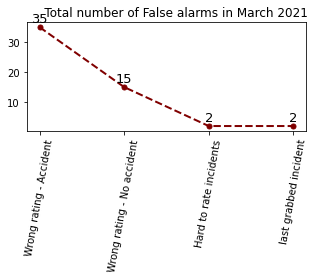

In [72]:
x=data_reviewers_support_March['Rating'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='maroon', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("     Total number of False alarms in March 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+1.8, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [73]:
data_reviewers_support_March['Rating'].count()

54

#### Checking for the reviewers involved in the false alarms for the March 2021

In [74]:
data_reviewers_support_March['Remarks'].unique()

array(['Shiva Kumar', 'Aparna', 'Shivam', 'Narendra', 'Kiran', 'Yuvaraja',
       'Rajeshwari', nan, 'Mallikarjun'], dtype=object)

In [75]:
data_reviewers_support_March['Remarks'].value_counts()

Aparna         14
Shivam         13
Kiran           7
Narendra        6
Yuvaraja        5
Shiva Kumar     4
Mallikarjun     3
Rajeshwari      2
Name: Remarks, dtype: int64

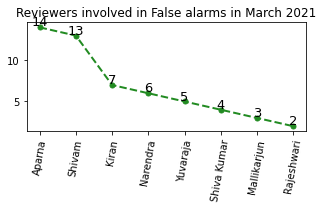

In [76]:
x=data_reviewers_support_March['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='forestgreen', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in False alarms in March 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.2, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [77]:
data_reviewers_support_March['Remarks'].count()

54

#### Counting the each reviewers false alarms for the March 2021
#### 1) Wrong rating - Accident 

In [78]:
wrong_rating_accident= data_reviewers_support_March[(data_reviewers_support_March['Rating']=='Wrong rating - Accident')]
wrong_rating_accident

,Date,Link to incident,link to slack,Rating,Remarks
95,2021-03-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
96,2021-03-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Shivam
97,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
98,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna
99,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna
100,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
104,2021-03-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Kiran
105,2021-03-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Yuvaraja
108,2021-03-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
109,2021-03-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna


In [79]:
wrong_rating_accident['Remarks'].value_counts()

Aparna         9
Shivam         8
Kiran          5
Narendra       5
Shiva Kumar    3
Rajeshwari     2
Yuvaraja       2
Mallikarjun    1
Name: Remarks, dtype: int64

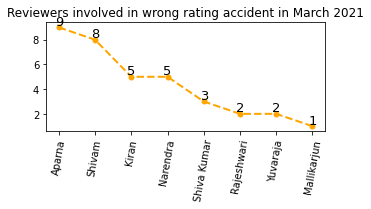

In [80]:
x=wrong_rating_accident['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in wrong rating accident in March 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.2, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [81]:
wrong_rating_accident['Remarks'].count()

35

#### 2) Wrong rating - No accident

In [82]:
wrong_rating_no_accident= data_reviewers_support_March[(data_reviewers_support_March['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident

,Date,Link to incident,link to slack,Rating,Remarks
94,2021-03-01,NaN,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
101,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Narendra
102,2021-03-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Kiran
103,2021-03-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Yuvaraja
106,2021-03-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Kiran
107,2021-03-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Yuvaraja
110,2021-03-06,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
111,2021-03-06,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam
116,2021-03-13,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
117,2021-03-13,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam


In [83]:
wrong_rating_no_accident['Remarks'].value_counts()

Aparna         4
Shivam         3
Yuvaraja       3
Kiran          2
Mallikarjun    1
Narendra       1
Shiva Kumar    1
Name: Remarks, dtype: int64

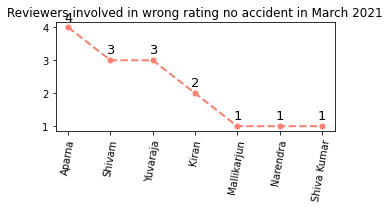

In [84]:
x=wrong_rating_no_accident['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='salmon', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in wrong rating no accident in March 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.2, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [85]:
wrong_rating_no_accident['Remarks'].count()

15

#### 3) last grabbed incident

In [86]:
last_grabbed_incident= data_reviewers_support_March[(data_reviewers_support_March['Rating']=='last grabbed incident')]
last_grabbed_incident

,Date,Link to incident,link to slack,Rating,Remarks
142,2021-03-29,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,last grabbed incident,Shivam
143,2021-03-29,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,last grabbed incident,Mallikarjun


In [87]:
last_grabbed_incident['Remarks'].value_counts()

Shivam         1
Mallikarjun    1
Name: Remarks, dtype: int64

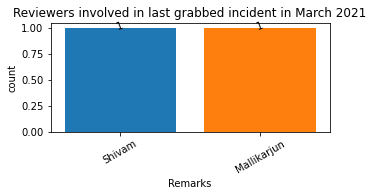

In [88]:
plt.figure(figsize=(5,2))
splot=sns.countplot(last_grabbed_incident['Remarks'],order=last_grabbed_incident['Remarks'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in last grabbed incident in March 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [89]:
last_grabbed_incident['Remarks'].count()

2

#### 4) Hard to rate incidents

In [90]:
Hard_to_rate_incidents= data_reviewers_support_March[(data_reviewers_support_March['Rating']=='Hard to rate incidents')]
Hard_to_rate_incidents

,Date,Link to incident,link to slack,Rating,Remarks
120,2021-03-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Hard to rate incidents,Aparna
121,2021-03-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Hard to rate incidents,Shivam


In [91]:
Hard_to_rate_incidents['Remarks'].value_counts()

Aparna    1
Shivam    1
Name: Remarks, dtype: int64

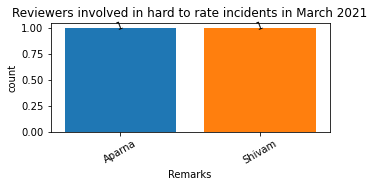

In [92]:
plt.figure(figsize=(5,2))
splot=sns.countplot(Hard_to_rate_incidents['Remarks'],order=Hard_to_rate_incidents['Remarks'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in hard to rate incidents in March 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [93]:
Hard_to_rate_incidents['Remarks'].count()

2

## 6) Analysis of the ratings and remarks in the month of April 2021

In [94]:
data_reviewers_support_April=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-04-01') & (data_reviewers_support['Date'] <= '2021-04-30')]
data_reviewers_support_April.head()

,Date,Link to incident,link to slack,Rating,Remarks
149,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Shivam
150,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
151,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,NaN
152,2021-04-05,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Leenu
153,2021-04-05,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shiva Kumar


In [95]:
data_reviewers_support_April.shape

(24, 5)

In [96]:
data_reviewers_support_April.size

120

In [97]:
data_reviewers_support_April.isna().sum().to_frame().T

,Date,Link to incident,link to slack,Rating,Remarks
0,0,3,0,0,2


#### Checking total false alarms in the month of April 2021

In [98]:
data_reviewers_support_April['Rating'].unique()

array(['Wrong rating - Accident', 'Wrong rating - No accident',
       'https://nexar.slack.com/archives/C01ESDUFXT4/p1618183873342900',
       'https://nexar.slack.com/archives/C01ESDUFXT4/p1618180258339300',
       'https://nexar.slack.com/archives/C01ESDUFXT4/p1618250542409700'],
      dtype=object)

In [99]:
data_reviewers_support_April['Rating'].value_counts()

Wrong rating - Accident                                           13
Wrong rating - No accident                                         8
https://nexar.slack.com/archives/C01ESDUFXT4/p1618180258339300     1
https://nexar.slack.com/archives/C01ESDUFXT4/p1618250542409700     1
https://nexar.slack.com/archives/C01ESDUFXT4/p1618183873342900     1
Name: Rating, dtype: int64

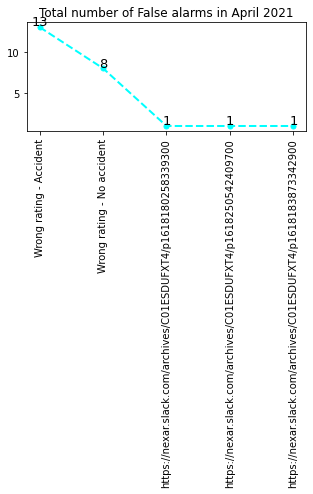

In [100]:
x=data_reviewers_support_April['Rating'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='aqua', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.title("Total number of False alarms in April 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.2, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [101]:
data_reviewers_support_April['Rating'].count()

24

#### Checking for the reviewers involved in the false alarms for the April 2021

In [102]:
data_reviewers_support_April['Remarks'].unique()

array(['Shivam', 'Aparna', nan, 'Leenu', 'Shiva Kumar', 'Raushan',
       'Shivam out for 1 hour', 'Shivam out for 25 mins',
       'Shiva Kumar out for 36 mins', 'Yuvaraja', 'Rajeshwari',
       'Mallikarjun'], dtype=object)

In [103]:
data_reviewers_support_April['Remarks'].value_counts()

Aparna                         6
Raushan                        4
Shiva Kumar                    2
Shivam                         2
Leenu                          2
Mallikarjun                    1
Shivam out for 1 hour          1
Shiva Kumar out for 36 mins    1
Rajeshwari                     1
Yuvaraja                       1
Shivam out for 25 mins         1
Name: Remarks, dtype: int64

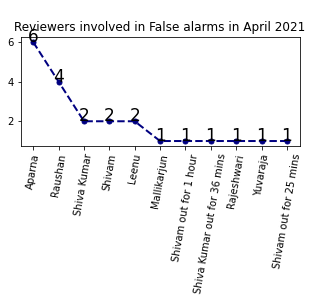

In [104]:
x=data_reviewers_support_April['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='navy', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in False alarms in April 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.01, "\n%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

In [105]:
data_reviewers_support_April['Remarks'].count()

22

#### Counting the each reviewers false alarms for the April 2021
#### 1) Wrong rating - Accident

In [106]:
wrong_rating_accident= data_reviewers_support_April[(data_reviewers_support_April['Rating']=='Wrong rating - Accident')]
wrong_rating_accident

,Date,Link to incident,link to slack,Rating,Remarks
149,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Shivam
150,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
156,2021-04-07,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Raushan
157,2021-04-07,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
160,2021-04-10,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Raushan
161,2021-04-10,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna
162,2021-04-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,NaN
166,2021-04-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Raushan
167,2021-04-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
168,2021-04-15,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Shivam


In [107]:
wrong_rating_accident['Remarks'].value_counts()

Aparna         5
Raushan        3
Shivam         2
Rajeshwari     1
Mallikarjun    1
Name: Remarks, dtype: int64

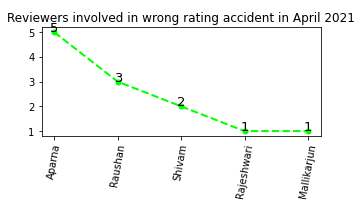

In [108]:
x=wrong_rating_accident['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='lime', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in wrong rating accident in April 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.02, "\n%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [109]:
wrong_rating_accident['Remarks'].count()

12

#### 2) Wrong rating - No accident

In [110]:
wrong_rating_no_accident= data_reviewers_support_April[(data_reviewers_support_April['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident

,Date,Link to incident,link to slack,Rating,Remarks
151,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,NaN
152,2021-04-05,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Leenu
153,2021-04-05,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shiva Kumar
154,2021-04-06,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Leenu
155,2021-04-06,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shiva Kumar
158,2021-04-08,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Raushan
159,2021-04-08,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
170,2021-04-15,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Yuvaraja


In [111]:
wrong_rating_no_accident['Remarks'].value_counts()

Leenu          2
Shiva Kumar    2
Yuvaraja       1
Raushan        1
Aparna         1
Name: Remarks, dtype: int64

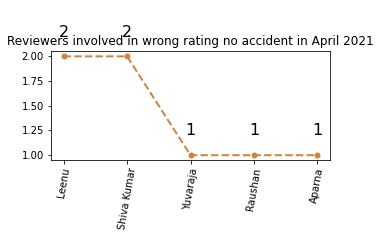

In [112]:
x=wrong_rating_no_accident['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(x,color='peru', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in wrong rating no accident in April 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.2, "\n%d" %v, ha="center",fontdict={'fontsize':'16'})
plt.show()

In [113]:
wrong_rating_no_accident['Remarks'].count()

7

## 7) Total analysis of the ratings and remarks
####  Checking total false alarms from January 2021 to April 2021

In [114]:
data_reviewers_support['Rating'].unique()

array(['Wrong rating - No accident', 'missed collision',
       '1hr 04mins - 1 reviewer only', 'grabbed no submitted review',
       '1hour to submit review',
       '4:04 last submitted- 6:37 grabbed= 2h 33m',
       'Wrong rating - Accident',
       'P1 missed accident - review resubmitted',
       'Hard to rate incidents', nan, 'last grabbed incident',
       'https://nexar.slack.com/archives/C01ESDUFXT4/p1618183873342900',
       'https://nexar.slack.com/archives/C01ESDUFXT4/p1618180258339300',
       'https://nexar.slack.com/archives/C01ESDUFXT4/p1618250542409700'],
      dtype=object)

In [115]:
data_reviewers_support['Rating'].value_counts()

Wrong rating - Accident                                           50
Wrong rating - No accident                                        33
missed collision                                                  32
Hard to rate incidents                                             2
last grabbed incident                                              2
https://nexar.slack.com/archives/C01ESDUFXT4/p1618180258339300     1
1hr 04mins - 1 reviewer only                                       1
https://nexar.slack.com/archives/C01ESDUFXT4/p1618183873342900     1
4:04 last submitted- 6:37 grabbed= 2h 33m                          1
grabbed no submitted review                                        1
https://nexar.slack.com/archives/C01ESDUFXT4/p1618250542409700     1
1hour to submit review                                             1
P1 missed accident - review resubmitted                            1
Name: Rating, dtype: int64

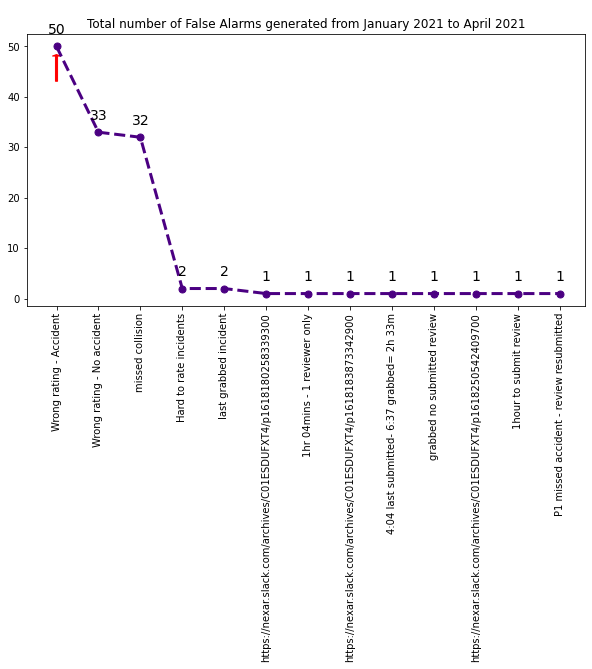

In [116]:
X=data_reviewers_support['Rating'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='indigo', marker='o', linestyle='dashed',linewidth=3, markersize=7)
plt.xticks(rotation=90)
plt.title("Total number of False Alarms generated from January 2021 to April 2021",color='black')
plt.arrow(0, 43.1, 0, 5, head_width = 0.2,width = 0.05,ec ='red',fc='red')
for i, v in enumerate(X):
    plt.text(i, v+2.4, "\n%d" %v, ha="center",fontdict={'fontsize':'14'})
plt.show()

#### Checking for the reviewers involved in the false alarms from January 2021 to April 2021

In [117]:
data_reviewers_support['Remarks'].unique()

array(['Mallikarjun', 'Narendra', 'Yuvaraja', nan, 'Shiva Kumar',
       'Shivam', 'Aparna', 'Rajeshwari', 'Kiran', 'Leenu', 'Raushan',
       'Shivam out for 1 hour', 'Shivam out for 25 mins',
       'Shiva Kumar out for 36 mins'], dtype=object)

In [118]:
data_reviewers_support['Remarks'].value_counts()

Aparna                         30
Shivam                         24
Yuvaraja                       14
Narendra                       12
Shiva Kumar                    10
Kiran                          10
Mallikarjun                     7
Rajeshwari                      6
Raushan                         4
Leenu                           2
Shivam out for 1 hour           1
Shivam out for 25 mins          1
Shiva Kumar out for 36 mins     1
Name: Remarks, dtype: int64

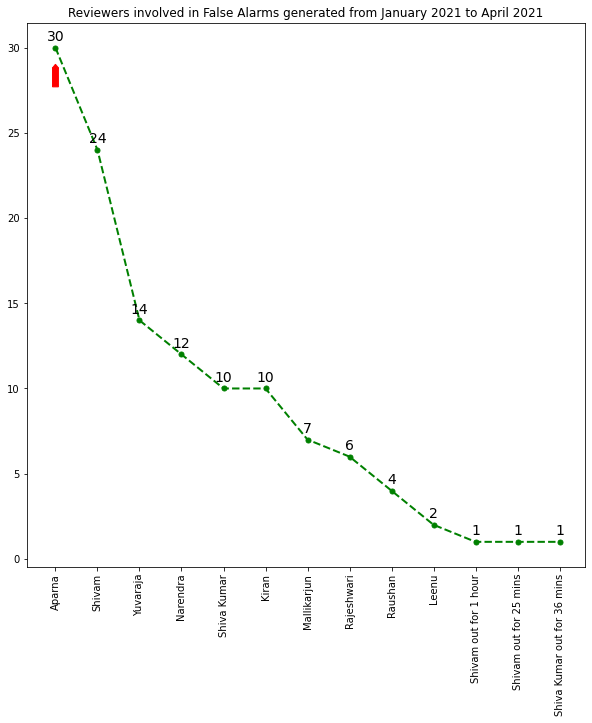

In [119]:
X=data_reviewers_support['Remarks'].value_counts()
plt.figure(figsize=(10,10))
plt.plot(X,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.arrow(0, 27.7, 0, 1.1, head_width = 0.15,width = 0.14,ec ='red',fc='red')
plt.title("Reviewers involved in False Alarms generated from January 2021 to April 2021",color='black')
for i, v in enumerate(X):
    plt.text(i, v+.4, "\n%d" %v, ha="center",fontdict={'fontsize':'14'})
plt.show()

#### Counting the each reviewers false alarms from January 2021 to April 2021
#### 1) Wrong rating - Accident

In [120]:
wrong_rating_accident= data_reviewers_support[(data_reviewers_support['Rating']=='Wrong rating - Accident')]
wrong_rating_accident.head()

,Date,Link to incident,link to slack,Rating,Remarks
91,2021-02-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Kiran
92,2021-02-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna
95,2021-03-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
96,2021-03-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Shivam
97,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra


In [121]:
wrong_rating_accident['Remarks'].value_counts()

Aparna         15
Shivam         10
Kiran           6
Narendra        5
Shiva Kumar     3
Raushan         3
Rajeshwari      3
Mallikarjun     2
Yuvaraja        2
Name: Remarks, dtype: int64

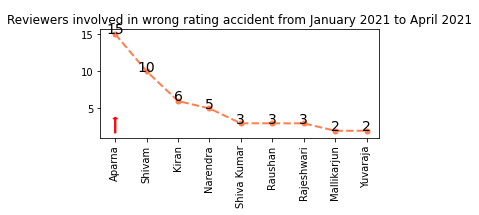

In [122]:
X=wrong_rating_accident['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(X,color='coral', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.title("Reviewers involved in wrong rating accident from January 2021 to April 2021",color='black')
plt.arrow(0, 1.7, 0, 1.9, head_width = 0.15,width = 0.04,ec ='red',fc='red')
for i, v in enumerate(X):
    plt.text(i, v+0.04, "\n%d" %v, ha="center",fontdict={'fontsize':'14'})
plt.show()

In [123]:
wrong_rating_accident['Remarks'].count()

49

#### 2) Wrong rating - No accident

In [124]:
wrong_rating_no_accident= data_reviewers_support[(data_reviewers_support['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident.head()

,Date,Link to incident,link to slack,Rating,Remarks
45,2021-01-22,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Mallikarjun
55,2021-01-29,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Narendra
65,2021-02-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam
66,2021-02-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
67,2021-02-04,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam


In [125]:
wrong_rating_no_accident['Remarks'].value_counts()

Aparna         7
Shivam         7
Yuvaraja       5
Kiran          3
Shiva Kumar    3
Leenu          2
Narendra       2
Mallikarjun    2
Raushan        1
Name: Remarks, dtype: int64

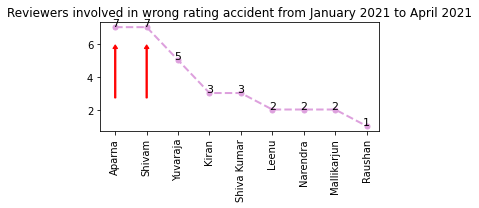

In [126]:
X=wrong_rating_no_accident['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(X,color='plum', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.arrow(0, 2.7, 0, 3.0, head_width = 0.15,width = 0.04,ec ='red',fc='red')
plt.arrow(1, 2.7, 0, 3.0, head_width = 0.15,width = 0.04,ec ='red',fc='red')
plt.title("Reviewers involved in wrong rating accident from January 2021 to April 2021",color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.04, "\n%d" %v, ha="center",fontdict={'fontsize':'11'})
plt.show()

In [127]:
wrong_rating_no_accident['Remarks'].count()

32

#### 3) missed collision

In [128]:
missed_collision= data_reviewers_support[(data_reviewers_support['Rating']=='missed collision')]
missed_collision.head()

,Date,Link to incident,link to slack,Rating,Remarks
46,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun
47,2021-01-24,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
48,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
49,2021-01-25,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
50,2021-01-25,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun


In [129]:
missed_collision['Remarks'].value_counts()

Aparna         7
Yuvaraja       7
Shivam         5
Narendra       4
Shiva Kumar    2
Rajeshwari     2
Mallikarjun    2
Kiran          1
Name: Remarks, dtype: int64

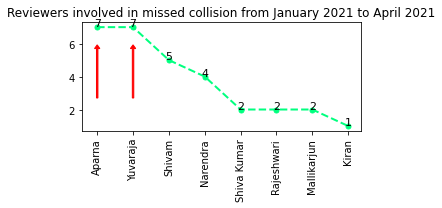

In [130]:
X=missed_collision['Remarks'].value_counts()
plt.figure(figsize=(5,2))
plt.plot(X,color='springgreen', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.arrow(0, 2.7, 0, 3.0, head_width = 0.15,width = 0.04,ec ='red',fc='red')
plt.arrow(1, 2.7, 0, 3.0, head_width = 0.15,width = 0.04,ec ='red',fc='red')
plt.title("Reviewers involved in missed collision from January 2021 to April 2021",color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.04, "\n%d" %v, ha="center",fontdict={'fontsize':'11'})
plt.show()

In [131]:
missed_collision['Remarks'].count()

30

#### 4) last grabbed incident

In [132]:
last_grabbed_incident=data_reviewers_support[(data_reviewers_support['Rating']=='last grabbed incident')]
last_grabbed_incident.head()

,Date,Link to incident,link to slack,Rating,Remarks
142,2021-03-29,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,last grabbed incident,Shivam
143,2021-03-29,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,last grabbed incident,Mallikarjun


In [133]:
last_grabbed_incident['Remarks'].value_counts()

Shivam         1
Mallikarjun    1
Name: Remarks, dtype: int64

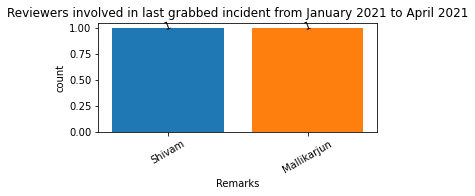

In [134]:
plt.figure(figsize=(5,2))
splot=sns.countplot(last_grabbed_incident['Remarks'],order=last_grabbed_incident['Remarks'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in last grabbed incident from January 2021 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [135]:
last_grabbed_incident['Remarks'].count()

2

#### 5) Hard to rate incidents

In [136]:
Hard_to_rate_incidents=data_reviewers_support[(data_reviewers_support['Rating']=='Hard to rate incidents')]
Hard_to_rate_incidents.head()

,Date,Link to incident,link to slack,Rating,Remarks
120,2021-03-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Hard to rate incidents,Aparna
121,2021-03-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Hard to rate incidents,Shivam


In [137]:
Hard_to_rate_incidents['Remarks'].value_counts()

Aparna    1
Shivam    1
Name: Remarks, dtype: int64

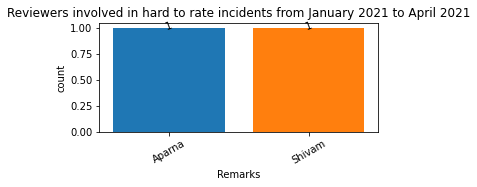

In [138]:
plt.figure(figsize=(5,2))
splot=sns.countplot(Hard_to_rate_incidents['Remarks'],order=Hard_to_rate_incidents['Remarks'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in hard to rate incidents from January 2021 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [139]:
Hard_to_rate_incidents['Remarks'].count()

2

#### 6) P1 missed accident - review resubmitted

In [140]:
P1_missed_accident_review_resubmitted=data_reviewers_support[(data_reviewers_support['Rating']=='P1 missed accident - review resubmitted')]
P1_missed_accident_review_resubmitted.head()

,Date,Link to incident,link to slack,Rating,Remarks
93,2021-02-28,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,P1 missed accident - review resubmitted,Shiva Kumar


In [141]:
P1_missed_accident_review_resubmitted['Remarks'].value_counts()

Shiva Kumar    1
Name: Remarks, dtype: int64

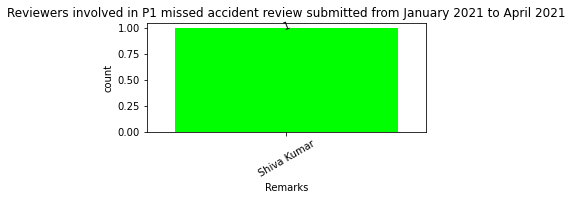

In [142]:
plt.figure(figsize=(5,2))
splot=sns.countplot(P1_missed_accident_review_resubmitted['Remarks'],order=P1_missed_accident_review_resubmitted['Remarks'].value_counts().index,saturation=10,color='lime')
plt.xticks(rotation=30)
plt.title("Reviewers involved in P1 missed accident review submitted from January 2021 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [143]:
P1_missed_accident_review_resubmitted['Remarks'].count()

1

#### 7) 1hour to submit review 

In [144]:
onehour_to_submit_review=data_reviewers_support[(data_reviewers_support['Rating']=='1hour to submit review')]
onehour_to_submit_review.head()

,Date,Link to incident,link to slack,Rating,Remarks
73,2021-02-06,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01ESDUFXT4/p...,1hour to submit review,Rajeshwari


In [145]:
onehour_to_submit_review['Remarks'].value_counts()

Rajeshwari    1
Name: Remarks, dtype: int64

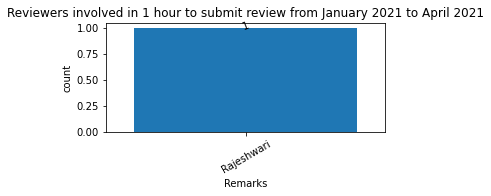

In [146]:
plt.figure(figsize=(5,2))
splot=sns.countplot(onehour_to_submit_review['Remarks'],order=onehour_to_submit_review['Remarks'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in 1 hour to submit review from January 2021 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 8) 4:04 last submitted- 6:37 grabbed= 2h 33m

In [147]:
fourzerofour_last_submitted_6_37_grabbed_2h_33m=data_reviewers_support[(data_reviewers_support['Rating']=='4:04 last submitted- 6:37 grabbed= 2h 33m')]
fourzerofour_last_submitted_6_37_grabbed_2h_33m.head()

,Date,Link to incident,link to slack,Rating,Remarks
74,2021-02-08,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,4:04 last submitted- 6:37 grabbed= 2h 33m,Shiva Kumar


In [148]:
fourzerofour_last_submitted_6_37_grabbed_2h_33m['Remarks'].value_counts()

Shiva Kumar    1
Name: Remarks, dtype: int64

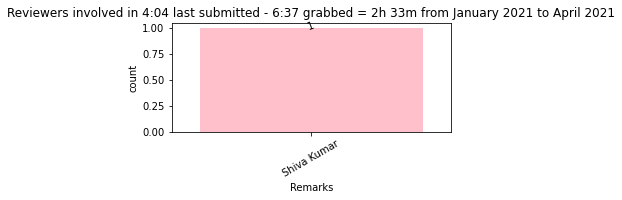

In [149]:
plt.figure(figsize=(5,2))
splot=sns.countplot(fourzerofour_last_submitted_6_37_grabbed_2h_33m['Remarks'],order=fourzerofour_last_submitted_6_37_grabbed_2h_33m['Remarks'].value_counts().index,saturation=10,color='pink')
plt.xticks(rotation=30)
plt.title("Reviewers involved in 4:04 last submitted - 6:37 grabbed = 2h 33m from January 2021 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 9) grabbed no submitted review

In [150]:
grabbed_no_submitted_review=data_reviewers_support[(data_reviewers_support['Rating']=='grabbed no submitted review')]
grabbed_no_submitted_review.head()

,Date,Link to incident,link to slack,Rating,Remarks
72,2021-02-06,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01ESDUFXT4/p...,grabbed no submitted review,Narendra


In [151]:
grabbed_no_submitted_review['Remarks'].value_counts()

Narendra    1
Name: Remarks, dtype: int64

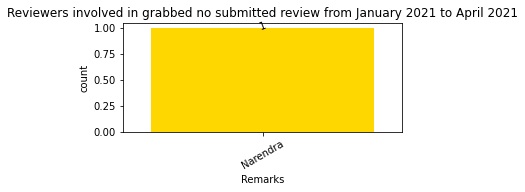

In [152]:
plt.figure(figsize=(5,2))
splot=sns.countplot(grabbed_no_submitted_review['Remarks'],order=grabbed_no_submitted_review['Remarks'].value_counts().index,saturation=10,color='gold')
plt.xticks(rotation=30)
plt.title("Reviewers involved in grabbed no submitted review from January 2021 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 10) 1hr 04mins - 1 reviewer only

In [153]:
onehr_04mins_1_reviewer_only=data_reviewers_support[(data_reviewers_support['Rating']=='1hr 04mins - 1 reviewer only')]
onehr_04mins_1_reviewer_only

,Date,Link to incident,link to slack,Rating,Remarks
51,2021-01-25,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,1hr 04mins - 1 reviewer only,NaN
